In [1]:
pip install -U pip setuptools

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import mutual_info_regression
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import RandomizedSearchCV

# Models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor

# Evaluation
from sklearn.metrics import mean_squared_log_error

In [4]:
df = pd.read_csv(r'C:\Users\sanke\OneDrive\Desktop\Projects\Machine Hack\Hack 2\train.csv')

In [5]:
#Lower casing the feature names

df.columns = df.columns.str.lower()

In [6]:
# Renaming the columns

df.rename(columns = {'charges_2 (%)': 'charges_2'}, inplace = True)

In [7]:
df[df['discount_avail'].isnull()]

,product_id,stall_no,instock_date,market_category,customer_name,loyalty_customer,product_category,grade,demand,discount_avail,charges_1,charges_2,minimum_price,maximum_price,selling_price
64,NKCECW7BSTZBHH6R,2.0,24/09/2015 17:26,268,Tyrus,Yes,Hospitality,2,28,NaN,340.0,9.0,945.0,2956.0,NaN
128,SHIEHXZEWWACSXRQ,26.0,12/11/2015 15:20,62,Kaizen,Yes,Child_care,0,70,NaN,290.0,7.0,2895.0,12275.0,7801.506900
275,SCFEHFMHWZNYMH9C,45.0,05/05/2015 15:10,73,Amir,No,Repair,0,87,NaN,208.0,8.0,1133.0,1608.0,233.528064
398,CRTECN2QUCD97JY3,25.0,23/09/2015 14:31,65,Jan,Yes,Educational,0,73,NaN,139.0,16.0,1245.0,2872.0,2178.782100
470,SHIE9WHT4M9FHMB5,24.0,05/05/2015 16:10,235,Elliot,Yes,Home_decor,2,2,NaN,297.0,15.0,3132.0,6194.0,744.973995
812,PTPE3KKX3DBHYFVX,24.0,21/10/2015 00:09,3,Azari,No,Repair,0,85,NaN,223.0,9.0,3098.0,4153.0,569.444198
822,WATEHYMDBDZAYJ4E,25.0,10/11/2015 16:09,471,Jalisa,Yes,Home_decor,2,25,NaN,290.0,14.0,2183.0,4942.0,577.176941
888,JEAECN2PWUKFA9GJ,23.0,06/12/2014 15:25,460,Hudson,No,Home_decor,3,82,NaN,213.0,17.0,252.0,NaN,539.684992
1162,BRAE8EHTZYYGGETT,13.0,20/08/2015 21:31,423,Tania,No,Hospitality,0,52,NaN,319.0,9.0,1546.0,5653.0,3896.640864
1280,NKCE3Y6E4VQWEHZS,33.0,26/09/2015 13:18,205,Marigold,No,Child_care,0,61,NaN,342.0,17.0,2121.0,3310.0,3031.498800


In [8]:
# Discount_avail
# 1.0 where the corresponding selling price is low.


df.loc[[275, 470, 888, 822,812,3402], 'discount_avail'] = 1.0

In [9]:
# 0.0 where the corresponding selling price is high, meaning that discount was not given.

df.discount_avail.fillna(0.0, inplace = True)

In [10]:
# Onehot encoding the product_category

ohe = pd.get_dummies(df.product_category, prefix = 'prod', prefix_sep= '_', dtype = float )

In [11]:
# Concatenating both the dataframes

df = pd.concat([df, ohe], axis = 1, join = 'outer' )

In [12]:
# Splitting the instock date into just the day and month columns

df['day'] = pd.to_datetime(df.instock_date).dt.day
df['month'] = pd.to_datetime(df.instock_date).dt.month

In [13]:
# Numeralising the loyalty_customer column

le = preprocessing.LabelEncoder()

df['loyalty_customer'] = le.fit_transform(df.loyalty_customer)

In [14]:
# Converting the grade column dtype to float

df.grade = df.grade.astype(float)

In [15]:
# Dropping unnecessary features

df.drop(['product_id', 'instock_date', 'product_category', 'customer_name'], axis = 1, inplace = True)

In [16]:
len(df.columns)

23

In [17]:
# Splitting the data into train and test
df

,stall_no,market_category,loyalty_customer,grade,demand,discount_avail,charges_1,charges_2,minimum_price,maximum_price,...,prod_Educational,prod_Fashion,prod_Home_decor,prod_Hospitality,prod_Organic,prod_Pet_care,prod_Repair,prod_Technology,day,month
0,37.0,2,1,1.0,68,0.0,376.0,11.0,2983.0,4713.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22,8
1,38.0,24,1,0.0,51,0.0,397.0,12.0,7495.0,10352.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27,3
2,9.0,447,1,0.0,10,0.0,250.0,9.0,5752.0,7309.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,8
3,50.0,23,1,2.0,48,0.0,144.0,13.0,5090.0,20814.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,3
4,7.0,63,1,1.0,35,1.0,211.0,4.0,2430.0,9261.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,17.0,24,1,0.0,47,0.0,614.0,10.0,8174.0,11266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28,3
6364,21.0,55,1,0.0,35,0.0,269.0,5.0,3564.0,4920.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11
6365,36.0,358,0,3.0,29,0.0,283.0,3.0,5303.0,14614.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19,11
6366,27.0,452,1,0.0,8,0.0,267.0,3.0,4334.0,5849.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,8


In [18]:
y = df['selling_price']

In [19]:
y = y.to_frame(name = 'selling_price')

In [20]:
y.selling_price = y['selling_price'].abs()

In [21]:
df.drop('selling_price', axis  = 1, inplace = True)

In [22]:
x = df[:]

In [23]:
x

,stall_no,market_category,loyalty_customer,grade,demand,discount_avail,charges_1,charges_2,minimum_price,maximum_price,...,prod_Educational,prod_Fashion,prod_Home_decor,prod_Hospitality,prod_Organic,prod_Pet_care,prod_Repair,prod_Technology,day,month
0,37.0,2,1,1.0,68,0.0,376.0,11.0,2983.0,4713.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22,8
1,38.0,24,1,0.0,51,0.0,397.0,12.0,7495.0,10352.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27,3
2,9.0,447,1,0.0,10,0.0,250.0,9.0,5752.0,7309.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,8
3,50.0,23,1,2.0,48,0.0,144.0,13.0,5090.0,20814.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,3
4,7.0,63,1,1.0,35,1.0,211.0,4.0,2430.0,9261.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,17.0,24,1,0.0,47,0.0,614.0,10.0,8174.0,11266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28,3
6364,21.0,55,1,0.0,35,0.0,269.0,5.0,3564.0,4920.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11
6365,36.0,358,0,3.0,29,0.0,283.0,3.0,5303.0,14614.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19,11
6366,27.0,452,1,0.0,8,0.0,267.0,3.0,4334.0,5849.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,8


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [26]:
x_train.columns

Index(['stall_no', 'market_category', 'loyalty_customer', 'grade', 'demand',
       'discount_avail', 'charges_1', 'charges_2', 'minimum_price',
       'maximum_price', 'prod_Child_care', 'prod_Cosmetics',
       'prod_Educational', 'prod_Fashion', 'prod_Home_decor',
       'prod_Hospitality', 'prod_Organic', 'prod_Pet_care', 'prod_Repair',
       'prod_Technology', 'day', 'month'],
      dtype='object')

In [27]:
# Dealing with the missing values.

x_train.stall_no.isnull().sum()

3

In [28]:
x_train.grade.isnull().sum()

0

In [29]:
x_train.market_category.isnull().sum()

0

In [30]:
x_train.loyalty_customer.isnull().sum()

0

In [31]:
x_train.demand.isnull().sum()

0

In [32]:
x_train.discount_avail.isnull().sum()

0

In [33]:
x_train.charges_1.isnull().sum()

155

In [34]:
x_train.charges_2.isnull().sum()

161

In [35]:
x_train.minimum_price.isnull().sum()

29

In [36]:
x_train.maximum_price.isnull().sum()

289

In [37]:
x_train.day.isnull().sum()

0

In [38]:
x_train.month.isnull().sum()

0

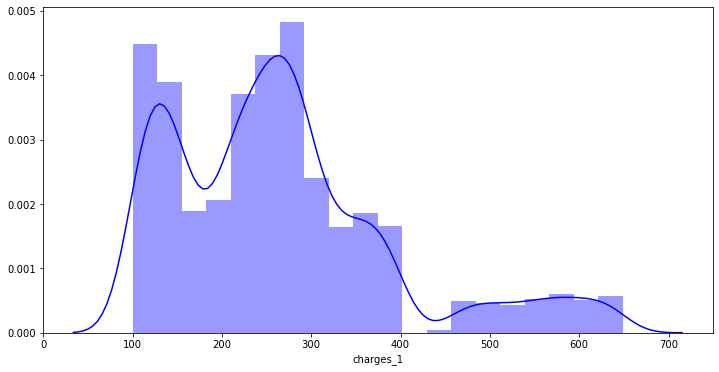

In [39]:
plt.figure(figsize=(12,6))
sns.distplot(x_train.charges_1, bins = 20, color = 'b', kde = True)
plt.show()

In [40]:
print(df.charges_1.mean())
print(df.charges_1.median())

264.51410048622364
252.0


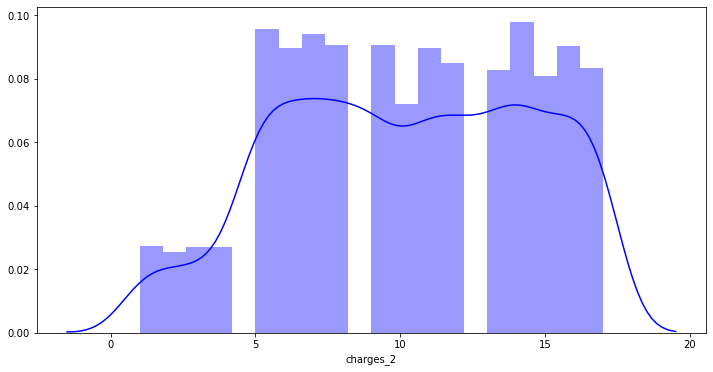

In [41]:
plt.figure(figsize=(12,6))
sns.distplot(x_train.charges_2, bins = 20, color = 'b', kde = True)
plt.show()

In [42]:
print(x_train.charges_2.mean())
print(x_train.charges_2.median())

10.187715386174741
10.0


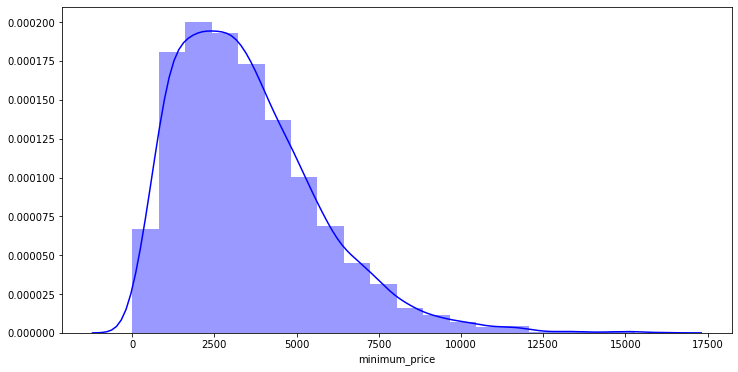

In [44]:
plt.figure(figsize=(12,6))
sns.distplot(x_train.minimum_price, bins = 20, color = 'b', kde = True)
plt.show()

In [45]:
print(x_train.minimum_price.mean())
print(x_train.minimum_price.median())

3512.7840078973345
3144.0


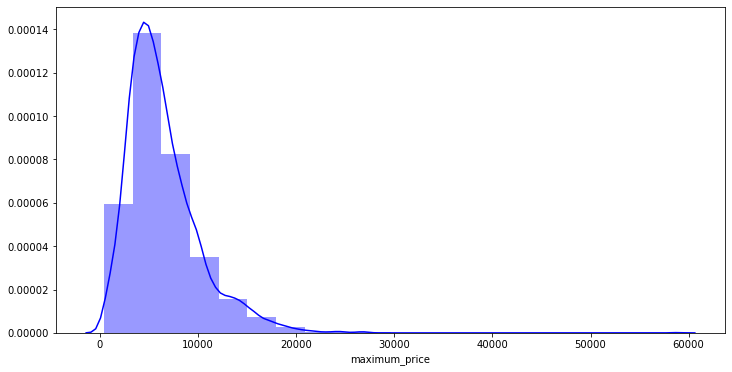

In [46]:
plt.figure(figsize=(12,6))
sns.distplot(x_train.maximum_price, bins = 20, color = 'b', kde = True)
plt.show()

In [47]:
print(x_train.maximum_price.mean())
print(x_train.maximum_price.median())

6416.4480749219565
5618.0


In [48]:
# disabling the warning

pd.options.mode.chained_assignment = None

In [49]:
# Imputing/ Dealing with the missing values

x_train['stall_no'].fillna(value=0, inplace=True)

In [50]:
x_train.charges_1.fillna(x_train.charges_1.mean(), inplace = True)

In [51]:
x_train.charges_2.fillna(x_train.charges_2.median(), inplace = True)

In [52]:
x_train.minimum_price.fillna(x_train.minimum_price.mean(), inplace=True)

In [53]:
x_train.maximum_price.fillna(x_train.maximum_price.mean(), inplace=True)

In [54]:
x_train

,stall_no,market_category,loyalty_customer,grade,demand,discount_avail,charges_1,charges_2,minimum_price,maximum_price,...,prod_Educational,prod_Fashion,prod_Home_decor,prod_Hospitality,prod_Organic,prod_Pet_care,prod_Repair,prod_Technology,day,month
575,2.0,23,1,2.0,21,0.0,337.000000,5.0,1211.0,3743.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,9
976,2.0,14,1,0.0,18,0.0,110.000000,7.0,3037.0,3944.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22,9
639,29.0,437,1,0.0,88,0.0,132.000000,15.0,7994.0,11337.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,8
4475,2.0,350,0,3.0,92,0.0,152.000000,11.0,4998.0,8863.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,8
5162,46.0,24,0,0.0,48,0.0,265.422758,16.0,3540.0,4665.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2.0,3,1,0.0,62,0.0,605.000000,11.0,1705.0,2885.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24,9
5192,14.0,63,1,1.0,93,0.0,363.000000,17.0,5845.0,14320.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27,3
3980,21.0,403,0,0.0,27,1.0,162.000000,8.0,1980.0,3115.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,9
235,20.0,452,0,0.0,17,0.0,369.000000,15.0,3222.0,4601.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,26,9


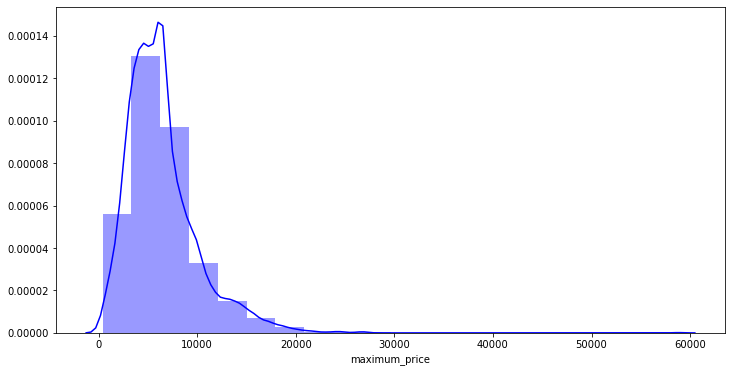

In [55]:
plt.figure(figsize=(12,6))
sns.distplot(x_train.maximum_price, bins = 20, color = 'b', kde = True)
plt.show()

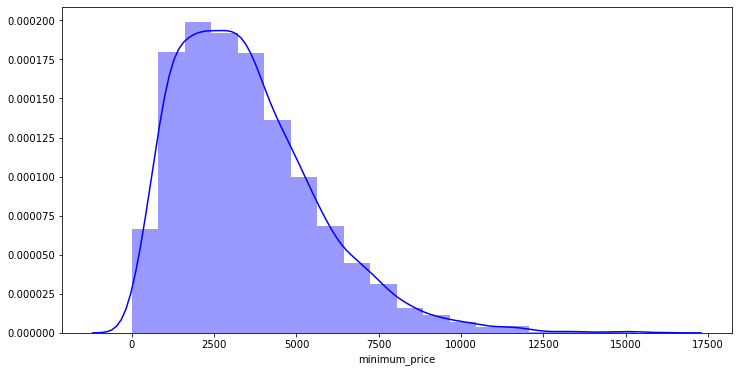

In [56]:
plt.figure(figsize=(12,6))
sns.distplot(x_train.minimum_price, bins = 20, color = 'b', kde = True)
plt.show()

In [57]:
x_train['average_price'] = (x_train['minimum_price'] + x_train['maximum_price'])/2

In [58]:
x_train['price_diff'] = (x_train['maximum_price'] - x_train['minimum_price'])

In [59]:
x_train.price_diff = x_train.price_diff.abs()

In [60]:
x_train['price_ratio'] = x_train['maximum_price']/x_train['minimum_price']

In [61]:
x_train.drop(['minimum_price', 'maximum_price'], axis = True, inplace = True)

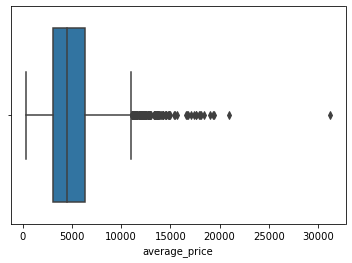

In [62]:
sns.boxplot(x_train.average_price)

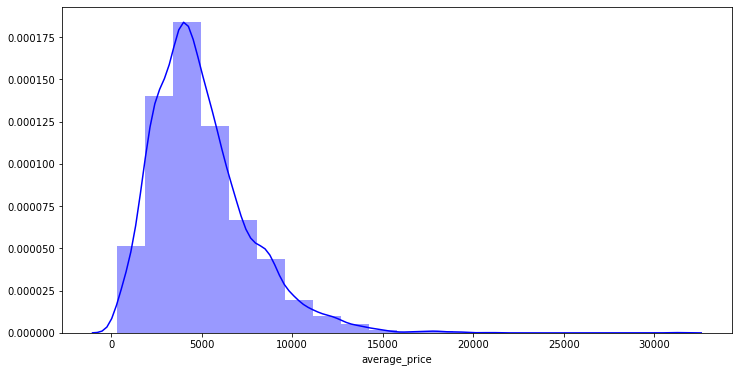

In [63]:
plt.figure(figsize=(12,6))
sns.distplot(x_train.average_price, bins = 20, color = 'b', kde = True)
plt.show()

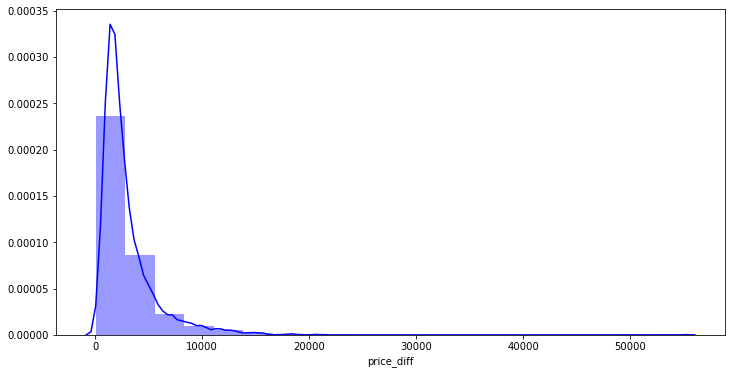

In [64]:
plt.figure(figsize=(12,6))
sns.distplot(x_train.price_diff, bins = 20, color = 'b', kde = True)
plt.show()

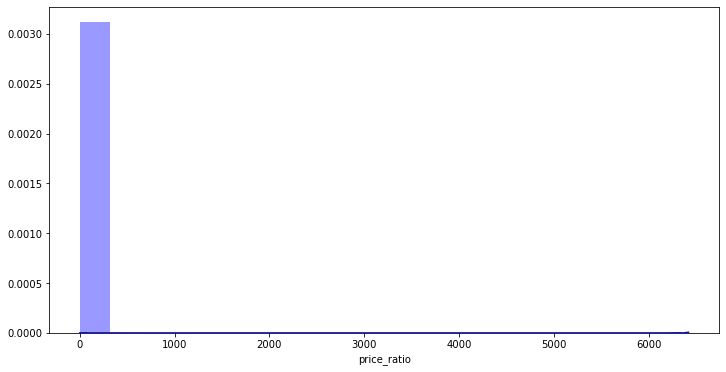

In [65]:
plt.figure(figsize=(12,6))
sns.distplot(x_train.price_ratio, bins = 20, color = 'b', kde = True)
plt.show()

In [66]:
power = PowerTransformer(method = 'box-cox', standardize=True)

In [67]:
x_train.average_price = power.fit_transform(x_train.average_price.values.reshape(-1,1))

In [68]:
x_train.price_diff = power.fit_transform(x_train.price_diff.values.reshape(-1,1))

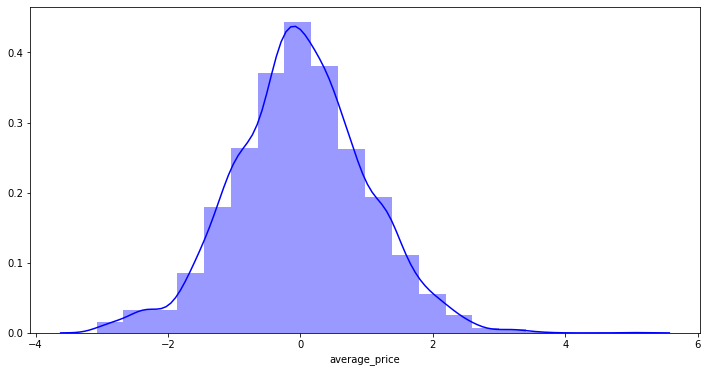

In [69]:
plt.figure(figsize=(12,6))
sns.distplot(x_train.average_price, bins = 20, color = 'b', kde = True)
plt.show()

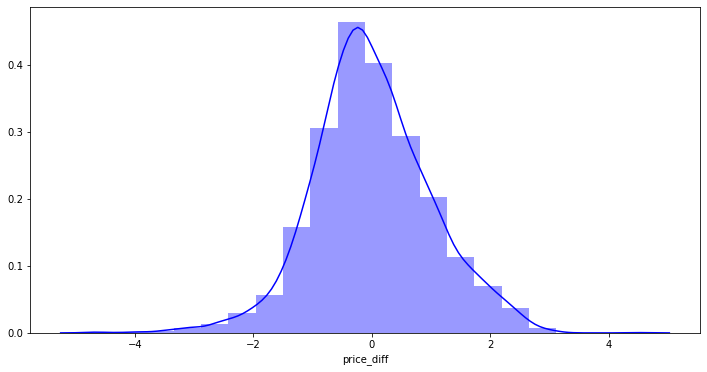

In [70]:
plt.figure(figsize=(12,6))
sns.distplot(x_train.price_diff, bins = 20, color = 'b', kde = True)
plt.show()

In [71]:
x_train.average_price = x_train.average_price.apply(lambda x : np.round(x,2))

In [72]:
x_train.charges_1 = x_train.charges_1.apply(lambda x : np.round(x,2))

In [73]:
x_train.average_price

575    -0.98
976    -0.45
639     1.58
4475    0.83
5162   -0.17
        ... 
905    -1.09
5192    1.68
3980   -0.94
235    -0.25
5157   -0.42
Name: average_price, Length: 5094, dtype: float64

In [74]:
x_train.charges_1

575     337.00
976     110.00
639     132.00
4475    152.00
5162    265.42
         ...  
905     605.00
5192    363.00
3980    162.00
235     369.00
5157    105.00
Name: charges_1, Length: 5094, dtype: float64

In [75]:
x_train.columns

Index(['stall_no', 'market_category', 'loyalty_customer', 'grade', 'demand',
       'discount_avail', 'charges_1', 'charges_2', 'prod_Child_care',
       'prod_Cosmetics', 'prod_Educational', 'prod_Fashion', 'prod_Home_decor',
       'prod_Hospitality', 'prod_Organic', 'prod_Pet_care', 'prod_Repair',
       'prod_Technology', 'day', 'month', 'average_price', 'price_diff',
       'price_ratio'],
      dtype='object')

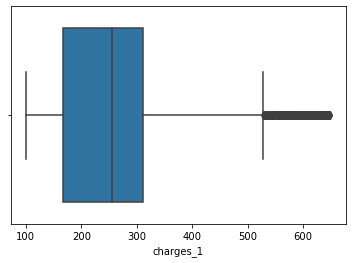

In [76]:
sns.boxplot(x_train.charges_1)

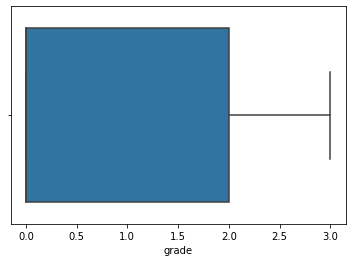

In [77]:
sns.boxplot(x_train.grade)

In [78]:
y_train.selling_price.isnull().sum()

37

In [79]:
y_train.selling_price

575      2808.201900
976      3602.579706
639      9670.707200
4475     6988.022272
5162     4323.213216
            ...     
905      2873.494800
5192    10311.977980
3980      405.714173
235      4285.941363
5157     3620.271600
Name: selling_price, Length: 5094, dtype: float64

In [80]:
print(y.selling_price.mean())
y.selling_price.median()

4580.406478458154


4215.972992

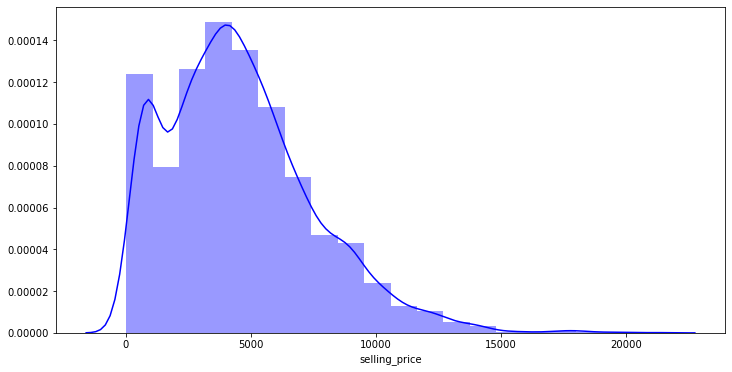

In [81]:
plt.figure(figsize=(12,6))
sns.distplot(y_train.selling_price, bins = 20, color = 'b', kde = True)
plt.show()

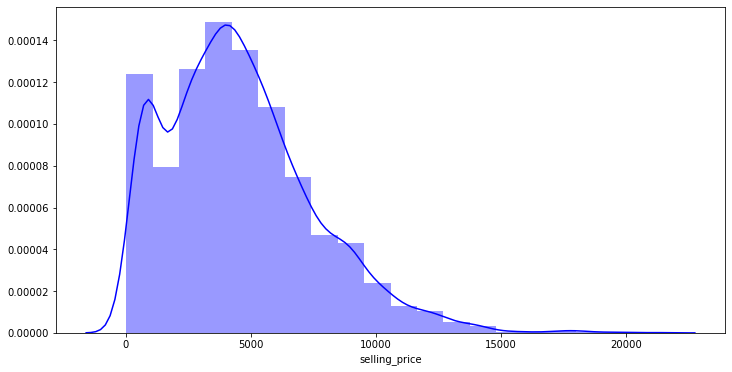

In [82]:
plt.figure(figsize=(12,6))
sns.distplot(y_train.selling_price, bins = 20, color = 'b', kde = True)
plt.show()

In [83]:
y.selling_price.isna().sum()

41

In [84]:
y.selling_price

0        4185.947700
1        9271.490256
2        6785.701362
3       13028.917820
4         906.553935
            ...     
6363    10277.520190
6364     4501.837200
6365    10218.878780
6366     5359.493997
6367     5220.013568
Name: selling_price, Length: 6368, dtype: float64

In [85]:
# Imputing values in target feature

y_train['selling_price'].fillna(y_train.selling_price.median(), inplace = True)

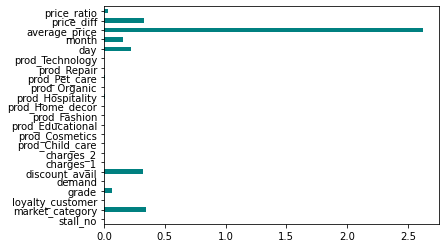

In [86]:
# Feature Selection
# Filter Methods

importance = mutual_info_regression(x_train, y_train.values.ravel())
feature_importances = pd.Series(importance, x_train.columns[0:])
feature_importances.plot(kind = 'barh', color = 'teal')
plt.show()


In [87]:
# Wrapper Methods


rfr = RandomForestRegressor()
sfs = SequentialFeatureSelector(rfr, k_features='best', forward=False, n_jobs=-1)
#sfs.fit(x_train, y_train.values.ravel())
#features = list(sfs.k_feature_names_)

In [ ]:
# Exhaustive feature selection

#efs = ExhaustiveFeatureSelector(RandomForestRegressor(), min_features=4, max_features=8, cv=2, scoring='neg_mean_squared_error')
#efs = efs.fit(x_train, y_train.values.ravel())
#features_efs = list(efs.best_idx_)
#score_efs = efs.best_score_

In [ ]:
#print(features_efs)
#print(score_efs)

In [ ]:
# Recursive Feature Elimination

rfe = RFE(RandomForestRegressor(random_state=1, n_jobs=-1), n_features_to_select= 5, step = 20, verbose = 5)
rfe.fit(x_train, y_train.values.ravel())

support = rfe.get_support()
rfe_feature = x_train.loc[:, support].columns.to_list()
print(rfe_feature)

In [ ]:
# Embedded method

rfr = RandomForestRegressor(random_state=1, n_jobs=-1).fit(x_train, y_train.values.ravel())

model = SelectFromModel(rfr, prefit = True, threshold=0.002, )



x_new = model.transform(x_train)

supportem = model.get_support()
em_feature = x_train.loc[:, supportem].columns.to_list()

In [ ]:
print(em_feature)

In [ ]:
# Sequential Feature Selector with Random Forest Regressor

['stall_no',
 'grade',
 'demand',
 'discount_avail',
 'charges_1',
 'charges_2',
 'prod_Child_care',
 'prod_Cosmetics',
 'prod_Educational',
 'prod_Home_decor',
 'day',
 'month',
 'average_price']


# RFE wrapper method

['stall_no', 'demand', 'discount_avail', 'charges_1', 'average_price']

#Embedded method

['stall_no',
 'market_category',
 'demand',
 'discount_avail',
 'charges_1',
 'charges_2',
 'average_price']

# top 4 embedded 
['stall_no', 'discount_avail', 'charges_1', 'average_price']


In [89]:
x_train_final = x_train[['discount_avail' ,'average_price' ,'price_diff','price_ratio' ]]

In [90]:
x_train_final.price_diff.isnull().sum()

0

# Preparing Test data

In [91]:
# performing same steps with the test data

x_test.columns

Index(['stall_no', 'market_category', 'loyalty_customer', 'grade', 'demand',
       'discount_avail', 'charges_1', 'charges_2', 'minimum_price',
       'maximum_price', 'prod_Child_care', 'prod_Cosmetics',
       'prod_Educational', 'prod_Fashion', 'prod_Home_decor',
       'prod_Hospitality', 'prod_Organic', 'prod_Pet_care', 'prod_Repair',
       'prod_Technology', 'day', 'month'],
      dtype='object')

In [92]:
x_test.stall_no.isnull().sum()

2

In [93]:
x_test.market_category.isnull().sum()

0

In [94]:
x_test.loyalty_customer.isnull().sum()

0

In [95]:
x_test.grade.isnull().sum()

0

In [96]:
x_test.demand.isnull().sum()

0

In [97]:
x_test.discount_avail.isnull().sum()

0

In [98]:
x_test.charges_1.isnull().sum()

43

In [99]:
x_test.charges_2.isnull().sum()

44

In [100]:
x_test.minimum_price.isnull().sum()

9

In [101]:
x_test.maximum_price.isnull().sum()

54

In [102]:
# Stall_no

x_test.stall_no.fillna(value=0, inplace=True)

In [103]:
x_test.loyalty_customer = x_test.loyalty_customer.astype(float)

In [104]:
x_test

,stall_no,market_category,loyalty_customer,grade,demand,discount_avail,charges_1,charges_2,minimum_price,maximum_price,...,prod_Educational,prod_Fashion,prod_Home_decor,prod_Hospitality,prod_Organic,prod_Pet_care,prod_Repair,prod_Technology,day,month
3432,14.0,452,1.0,0.0,26,0.0,489.0,7.0,3221.0,4372.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26,9
5386,15.0,358,1.0,3.0,80,0.0,271.0,13.0,4585.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,9
1686,36.0,55,1.0,0.0,48,0.0,159.0,9.0,911.0,2239.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,8
1576,44.0,108,0.0,0.0,6,0.0,183.0,1.0,1685.0,3362.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12,7
4510,48.0,14,1.0,0.0,81,0.0,273.0,6.0,3373.0,4505.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,25.0,162,1.0,1.0,94,1.0,104.0,10.0,3807.0,5966.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,8
6201,49.0,101,0.0,0.0,9,0.0,647.0,5.0,1169.0,1867.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17,1
4750,34.0,443,0.0,0.0,100,0.0,242.0,6.0,2861.0,5070.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21,9
3830,2.0,283,1.0,0.0,39,0.0,141.0,10.0,4614.0,9396.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,7


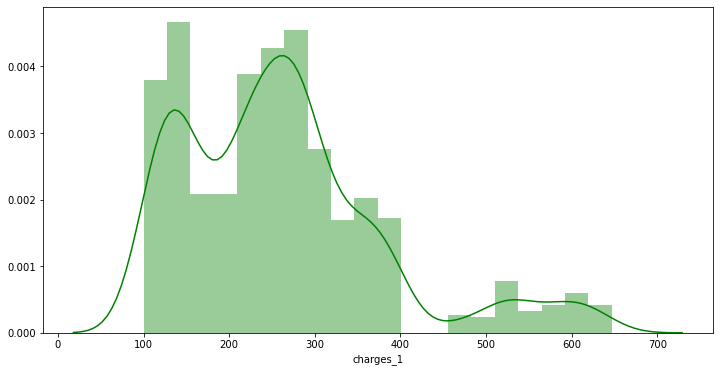

In [105]:
plt.figure(figsize=(12,6))
sns.distplot(x_test.charges_1, bins = 20, kde = True, color = 'g')
plt.show()

In [106]:
print(x_test.charges_1.mean())
x_test.charges_1.median()

260.8683996750609


252.0

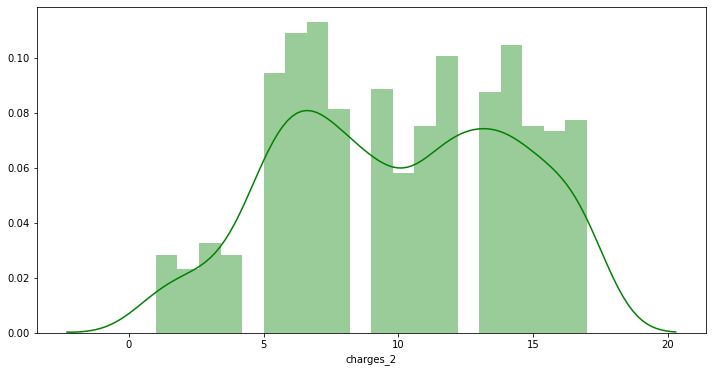

In [107]:
plt.figure(figsize=(12,6))
sns.distplot(x_test.charges_2, bins = 20, kde = True, color = 'g')
plt.show()

In [108]:
print(x_test.charges_2.median())
x_test.charges_2.mean()

10.0


9.979674796747968

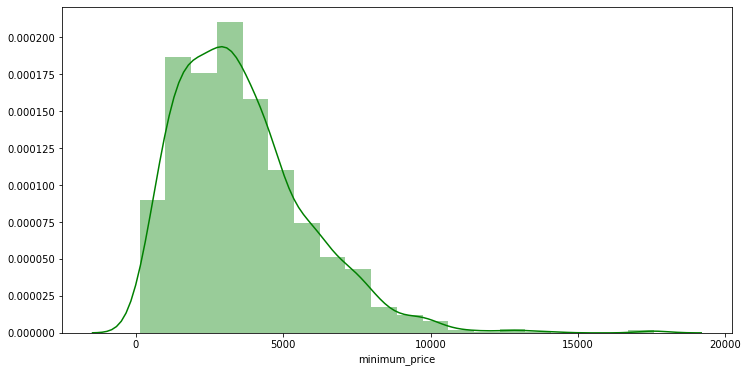

In [109]:
plt.figure(figsize=(12,6))
sns.distplot(x_test.minimum_price, bins = 20, kde = True, color = 'g')
plt.show()

In [110]:
print(x_test.minimum_price.median())
x_test.minimum_price.mean()

3221.0


3605.6861660079053

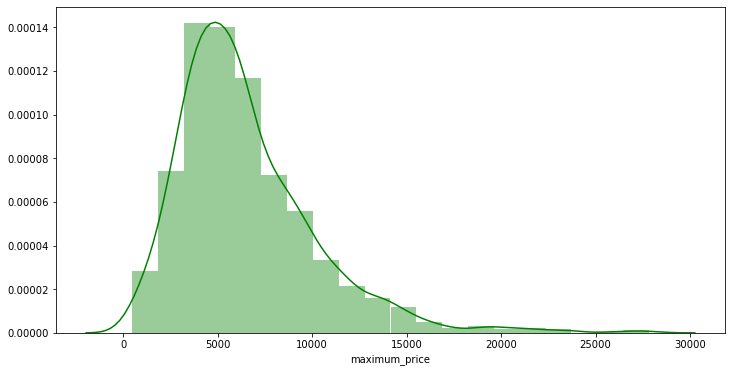

In [111]:
plt.figure(figsize=(12,6))
sns.distplot(x_test.maximum_price, bins = 20, kde = True, color = 'g')
plt.show()

In [112]:
print(x_test.maximum_price.mean())
x_test.maximum_price.median()

6495.947540983607


5712.0

In [113]:
# Imputing the missing values

In [114]:
x_test.charges_1.fillna(value=x_test.charges_1.mean(), inplace=True)

In [115]:
x_test.charges_2.fillna(value=x_test.charges_2.median(), inplace=True)

In [116]:
x_test.minimum_price.fillna(value=x_test.minimum_price.mean(), inplace=True)

In [117]:
x_test.maximum_price.fillna(value=x_test.maximum_price.mean(), inplace=True)

In [118]:
# Creating new feature average_price

x_test['average_price'] = (x_test['minimum_price'] + x_test['maximum_price'])/2

In [119]:
x_test['price_diff'] = (x_test['maximum_price'] - x_test['minimum_price'])

In [120]:
x_test['price_ratio'] = (x_test['maximum_price']/x_test['minimum_price'])

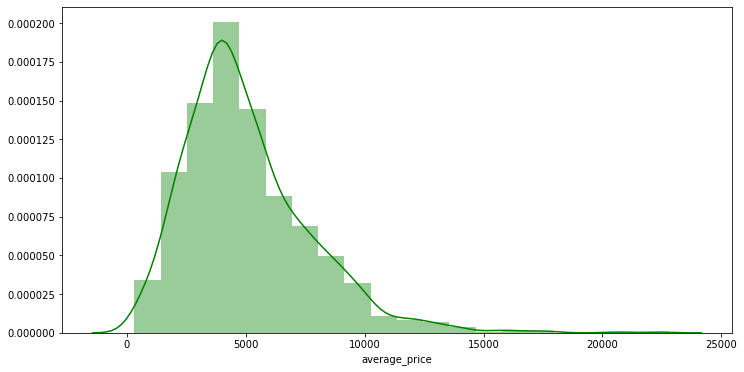

In [121]:
plt.figure(figsize=(12,6))
sns.distplot(x_test.average_price, bins = 20, kde = True, color = 'g')
plt.show()

In [122]:
x_test.price_ratio

3432    1.357342
5386    1.416782
1686    2.457739
1576    1.995252
4510    1.335606
          ...   
5724    1.567113
6201    1.597092
4750    1.772108
3830    2.036411
616     1.258934
Name: price_ratio, Length: 1274, dtype: float64

In [123]:
x_test.average_price = power.fit_transform(x_test.average_price.values.reshape(-1,1))

In [124]:
x_test.price_diff = x_test.price_diff.abs()

In [125]:
x_test.price_diff = power.fit_transform(x_test.price_diff.values.reshape(-1,1))

In [126]:
x_test.maximum_price = x_test.maximum_price.apply(lambda x:np.round(x,2))

In [127]:
x_test.average_price = x_test.average_price.apply(lambda x: np.round(x,2))

In [128]:
x_test.drop(['minimum_price', 'maximum_price'], axis=1, inplace=True)

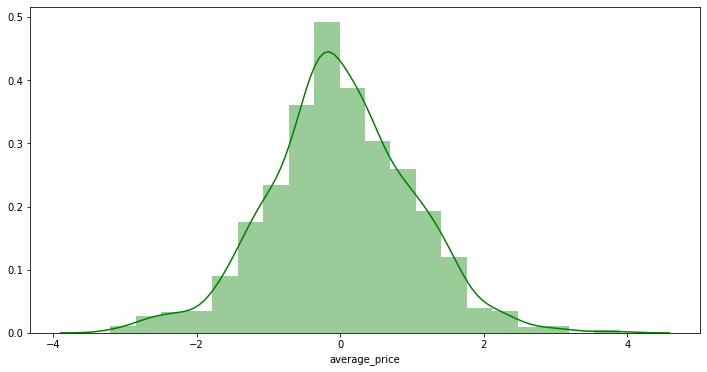

In [129]:
plt.figure(figsize=(12,6))
sns.distplot(x_test.average_price, bins = 20, kde = True, color = 'g')
plt.show()

In [130]:
x_test_final = x_test[['discount_avail' ,'average_price' ,'price_diff','price_ratio' ]]

In [131]:
x_test_final

,discount_avail,average_price,price_diff,price_ratio
3432,0.0,-0.35,-0.860091,1.357342
5386,0.0,0.35,-0.183973,1.416782
1686,0.0,-1.65,-0.669752,2.457739
1576,0.0,-1.00,-0.358545,1.995252
4510,0.0,-0.28,-0.882218,1.335606
...,...,...,...,...
5724,1.0,0.11,-0.020571,1.567113
6201,0.0,-1.69,-1.522988,1.597092
4750,0.0,-0.27,0.010109,1.772108
3830,0.0,0.83,1.050181,2.036411


In [134]:
y_test.selling_price.isnull().sum()

4

In [135]:
print(y_test.selling_price.median())
y_test.selling_price.mean()

4276.8228


4643.377384815991

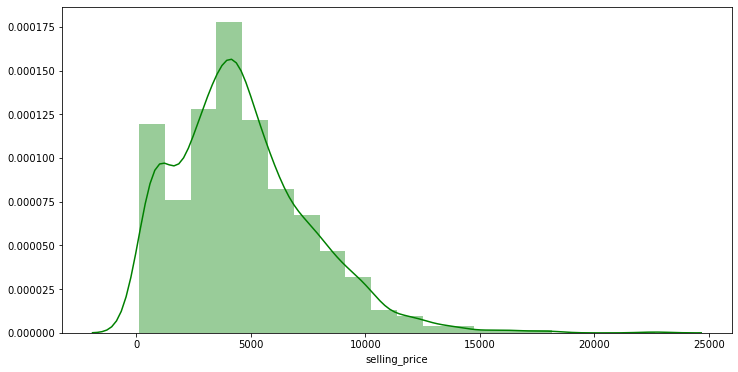

In [136]:
plt.figure(figsize=(12,6))
sns.distplot(y_test.selling_price, bins = 20, kde = True, color = 'g')
plt.show()

In [137]:
y_tstrl = y_test.copy()

In [138]:
y_test.selling_price.fillna(value=y_test.selling_price.mean(), inplace=True)

# Training the model

In [ ]:
dtr = DecisionTreeRegressor()
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle = True)
scoring = ('neg_mean_squared_error')
cv_results = cross_validate(dtr,x_train_final, y_train, cv = kf, scoring=scoring, return_train_score=False)
cv_results['test_score'].mean()

In [ ]:
x_train_final

In [ ]:
dtrfit = dtr.fit(x_train, y_train)
y_pred_dtr = dtrfit.predict(x_test)

In [ ]:
score = np.sqrt(mean_squared_log_error(y_test, y_pred_dtr))

In [ ]:
score

In [144]:
rfr = RandomForestRegressor(n_estimators=300,min_samples_split=3,min_samples_leaf=2,
                            max_features='auto',max_depth=5,bootstrap=True,n_jobs=-1, random_state=1)
rfr.fit(x_train_final, y_train.values.ravel())
y_predrfr = rfr.predict(x_test_final)


In [145]:
y_predrfr


array([ 3799.03101001,  5691.85383851,  1906.83293115, ...,
        3950.21236325,  7045.19260258, 10121.81920887])

In [146]:
score = np.sqrt(mean_squared_log_error(y_test, y_predrfr))

In [147]:
score_final = max(0,100 - score)

In [148]:
score_final

99.86541312244894

In [ ]:
print(asa

In [ ]:
param_grid = {'n_estimators': [200,700], 'max_features': ['auto', 'sqrt', 'log2'], 
              'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,3,4,5],
              'bootstrap':[True, False], 'max_depth':[int(x) for x in np.linspace(10,110, num = 11)]
               }

In [ ]:
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_grid,n_iter=100,
                              n_jobs=-1, cv=2, random_state=1)

rf_random.fit(x_train_final, y_train.values.ravel())

In [ ]:
rf_random.best_params_

In [ ]:
estimator

In [ ]:
# score 99.862365 - with four features excluding demand
# score 99.8623733 - with n_estimators as 650 and same four features
# score 99.8766 - with the best params from the RandomizedCVSearch

In [ ]:
# bagging regressor

bagreg = BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=100, random_state=1),n_jobs=-1 ,n_estimators = 100, random_state = 1)
bagreg.fit(x_train_final, y_train.values.ravel())
y_predbag = bagreg.predict(x_test)

In [ ]:
y_predbag = bagreg.predict(x_test)

In [ ]:
score_bagreg = np.sqrt(mean_squared_log_error(y_test, y_predbag))

In [ ]:
scorebagreg_final = max(0,100 - score_bagreg)

In [ ]:
scorebagreg_final

In [ ]:
#y_pred_final = pd.DataFrame(y_predrfr)

In [ ]:
#y_pred_final.rename(columns = {0:'selling_price'}, inplace=True)

In [ ]:
#y_pred_final['product_id'] = df['Product_id']

In [ ]:
#y_pred_final.columns[-1:]

In [ ]:
#cols = y_pred_final.columns.to_list()

In [ ]:
#cols = cols[-1:] + cols [:-1]

In [ ]:
#y_pred_final = y_pred_final[cols]

In [ ]:
# Stacking model

estimators =[('ExtraTreeReg', ExtraTreesRegressor()), ('AdaBoost', AdaBoostRegressor())]

stack_reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=150,min_samples_split=5,
                                                                                           min_samples_leaf=4, max_features='auto',n_jobs=-1,))

In [ ]:
sreg_fit = stack_reg.fit(x_train_final, y_train.values.ravel())

In [ ]:
y_predstack = sreg_fit.predict(x_test_final)

In [ ]:
score_stack = np.sqrt(mean_squared_log_error(y_test, y_predstack))

In [ ]:
scorestack_final = max(0,100 - score_stack)

In [ ]:
scorestack_final

# Real_Test_Data

In [194]:
test = pd.read_csv(r'C:\Users\sanke\OneDrive\Desktop\Projects\Machine Hack\Hack 2\test.csv')

In [195]:
test1 = test.copy()

In [150]:
test.Product_id

0       SCHE4YSTDVPVZVXW
1       ACCEGCATKHNRXUHW
2       NKCE6GJ5XVJDXNNZ
3       NKCEB8BK3ZXDHDHM
4       TOPEFDXSAHRNPF94
              ...       
3425    BBAE9K7BXFUTDNBK
3426    RTRDYPA4PJHCJCGF
3427    TUNE8FWQBS7TVVT7
3428    NKCEGMUABCRGUZPE
3429    RNGE7M92KAQWUBCS
Name: Product_id, Length: 3430, dtype: object

In [151]:
test.columns = test.columns.str.lower()

In [152]:
test.loyalty_customer = le.fit_transform(test.loyalty_customer)

In [153]:
ohe_test = pd.get_dummies(test.product_category, prefix = 'prod', prefix_sep='_', dtype = float )

In [154]:
test = pd.concat([test,ohe_test], axis = 1, join = 'outer')

In [155]:
test.rename(columns={'charges_2 (%)': 'charges_2'}, inplace=True)

In [156]:
test.drop(['product_id', 'customer_name', 'instock_date', 'product_category'], axis = 1, inplace=True)

In [157]:
test.stall_no.isnull().sum()

1

In [158]:
test.stall_no.fillna(value=0, inplace = True)

In [159]:
test.charges_1.isnull().sum()

36

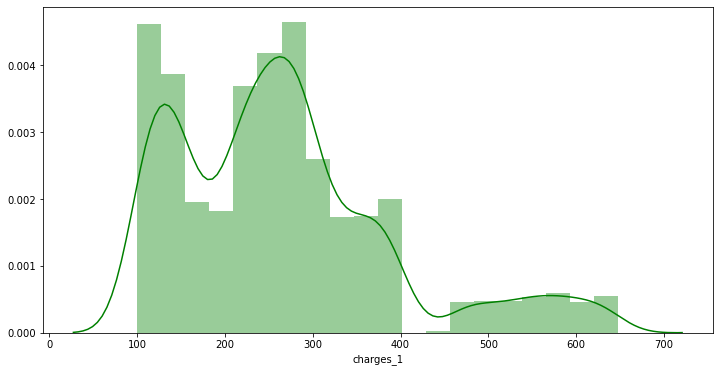

In [160]:
plt.figure(figsize=(12,6))
sns.distplot(test.charges_1, bins = 20, kde = True, color = 'g')
plt.show()

In [161]:
print(test.charges_1.median())
test.charges_1.mean()

252.0


265.4849734826164

In [162]:
test.charges_1.fillna(value=test.charges_1.mean(), inplace=True)

In [163]:
test.discount_avail = test.discount_avail.astype(float)

In [164]:
test.minimum_price.isnull().sum()

14

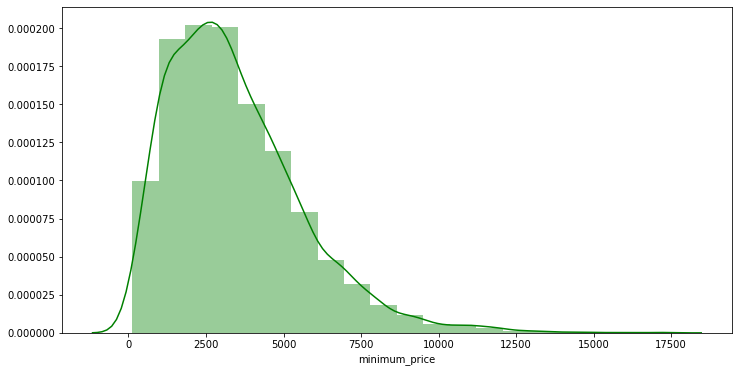

In [165]:
plt.figure(figsize=(12,6))
sns.distplot(test.minimum_price, bins = 20, kde = True, color = 'g')
plt.show()

In [166]:
print(test.minimum_price.mean())
test.minimum_price.median()

3444.2060889929744


3060.5

In [167]:
test.minimum_price.fillna(value=test.minimum_price.mean(), inplace=True)

In [168]:
test.maximum_price.isnull().sum()

0

In [169]:
test['average_price'] = (test['minimum_price'] + test['maximum_price'])/2

In [170]:
test['price_diff'] = (test['maximum_price'] - test['minimum_price'])

In [171]:
test['price_ratio'] = (test['maximum_price']/test['minimum_price'])

In [172]:
test.charges_2.isnull().sum()

5

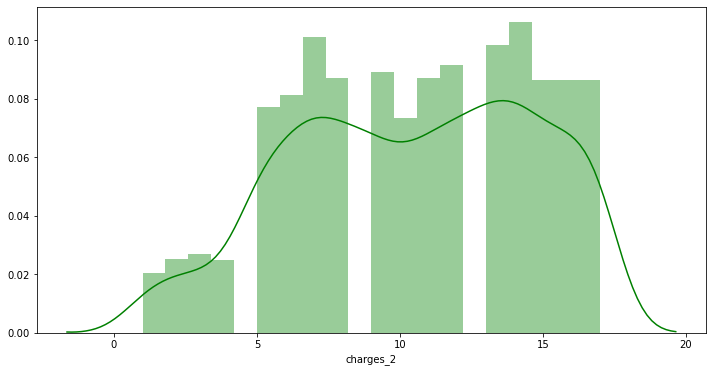

In [173]:
plt.figure(figsize=(12,6))
sns.distplot(test.charges_2, bins = 20, kde = True, color = 'g')
plt.show()

In [174]:
print(test.charges_2.mean())
test.charges_2.median()

10.436204379562044


11.0

In [175]:
test.charges_2.fillna(test.charges_2.median(), inplace=True)

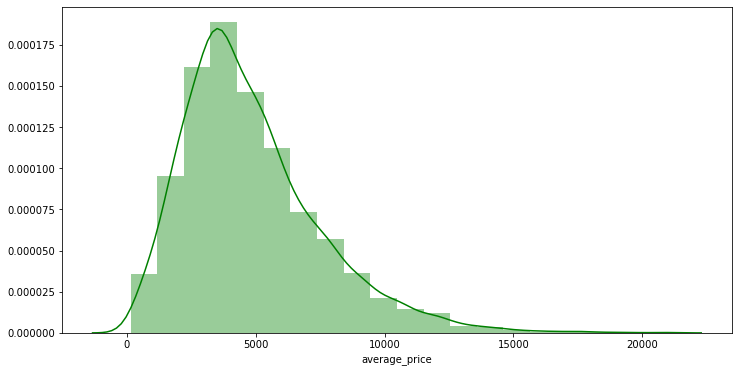

In [176]:
plt.figure(figsize=(12,6))
sns.distplot(test.average_price, bins = 20, kde = True, color = 'g')
plt.show()

In [177]:
test.average_price = power.fit_transform(test.average_price.values.reshape(-1,1))

In [178]:
test.price_diff = test.price_diff.abs()

In [179]:
test.price_diff = power.fit_transform(test.price_diff.values.reshape(-1,1))

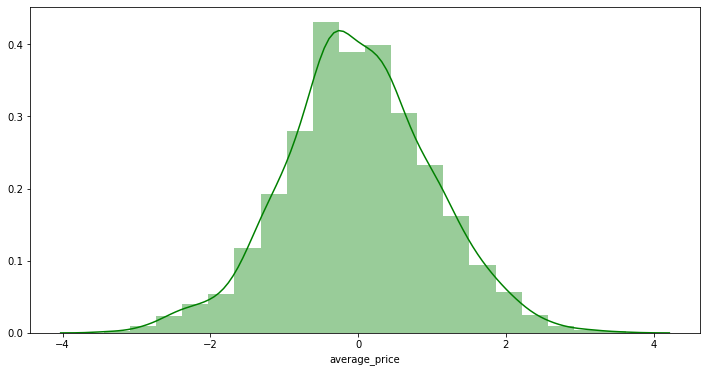

In [180]:
plt.figure(figsize=(12,6))
sns.distplot(test.average_price, bins = 20, kde = True, color = 'g')
plt.show()

In [181]:
test

,stall_no,market_category,loyalty_customer,grade,demand,discount_avail,charges_1,charges_2,minimum_price,maximum_price,...,prod_Fashion,prod_Home_decor,prod_Hospitality,prod_Organic,prod_Pet_care,prod_Repair,prod_Technology,average_price,price_diff,price_ratio
0,39.0,205,0,0,90,0.0,380.0,16.0,2576.0,3340,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.635659,-1.351639,1.296584
1,49.0,3,1,0,87,0.0,393.0,16.0,1202.0,1955,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.488121,-1.370983,1.626456
2,1.0,183,0,2,55,0.0,493.0,9.0,7175.0,15715,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.995820,1.878853,2.190244
3,8.0,358,1,3,86,0.0,303.0,16.0,5404.0,13078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.491200,1.735311,2.420059
4,33.0,167,0,0,27,0.0,567.0,16.0,4069.0,6244,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.294908,0.045860,1.534529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,9.0,58,1,0,39,0.0,117.0,5.0,3094.0,4674,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.202556,-0.381478,1.510666
3426,30.0,358,1,3,17,0.0,509.0,6.0,3384.0,14105,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.367031,2.184329,4.168144
3427,14.0,106,1,0,36,0.0,150.0,17.0,710.0,10894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.517177,2.115296,15.343662
3428,1.0,104,1,0,63,0.0,325.0,15.0,1477.0,5165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.456696,0.752734,3.496953


In [182]:
#'stall_no', 'average_price', 'charges_1', 'discount_avail', 'demand' 
# Could be added - 'market_category', 'charges_2' , 'day', 'month' , 'grade'

In [183]:
test.average_price = test.average_price.apply(lambda x : np.round(x,2))

In [184]:
test.charges_1 = test.charges_1.apply(lambda x : np.round(x,2))

In [185]:
test.drop(['minimum_price', 'maximum_price'], axis = 1, inplace=True)

In [186]:
len(x_test.columns)

23

In [190]:
test_final

,discount_avail,average_price,price_diff,price_ratio
0,0.0,-0.64,-1.351639,1.296584
1,0.0,-1.49,-1.370983,1.626456
2,0.0,2.00,1.878853,2.190244
3,0.0,1.49,1.735311,2.420059
4,0.0,0.29,0.045860,1.534529
...,...,...,...,...
3425,0.0,-0.20,-0.381478,1.510666
3426,0.0,1.37,2.184329,4.168144
3427,0.0,0.52,2.115296,15.343662
3428,0.0,-0.46,0.752734,3.496953


In [188]:
test_final = test[['discount_avail' ,'average_price' ,'price_diff','price_ratio' ]]

In [191]:
y_pred_test = rfr.predict(test_final)

In [192]:
y_pred_test

array([ 3350.59175734,  2147.48664285, 11880.7672373 , ...,
        6249.55565526,  3538.52608732,  1050.78465702])

In [193]:
y_pred_test = pd.DataFrame(y_pred_test)

In [196]:
y_pred_test['Product_id'] = test1['Product_id']

In [197]:
y_pred_test

,0,Product_id
0,3350.591757,SCHE4YSTDVPVZVXW
1,2147.486643,ACCEGCATKHNRXUHW
2,11880.767237,NKCE6GJ5XVJDXNNZ
3,9271.666608,NKCEB8BK3ZXDHDHM
4,5580.223766,TOPEFDXSAHRNPF94
...,...,...
3425,4115.647140,BBAE9K7BXFUTDNBK
3426,8747.495936,RTRDYPA4PJHCJCGF
3427,6249.555655,TUNE8FWQBS7TVVT7
3428,3538.526087,NKCEGMUABCRGUZPE


In [198]:
#y_pred_test.drop('product', axis = 1, inplace = True)

In [199]:
y_pred_test.rename(columns={0: 'Selling_Price'}, inplace=True)

In [202]:
cols2 = y_pred_test.columns.to_list() 

In [203]:
cols2 = cols2[-1:] + cols2[:-1]

In [204]:
y_pred_test = y_pred_test[cols2]

In [205]:
y_pred_test.to_csv('C:\\Users\\sanke\\OneDrive\\Desktop\\Projects\\Machine Hack\\Hack 2\\sub_2.csv', encoding='utf-8', index=False)

In [ ]:
#y_tstdtr = dtr.predict(test_final)

In [ ]:
y_predbag = bagreg.predict(test_final)

In [ ]:
y_predbag = pd.DataFrame(y_predbag)
y_predbag.rename(columns = {0: 'Selling_Price'}, inplace = True)
y_predbag['Product_id'] = test['Product_id']


In [ ]:
colsbag = y_predbag.columns.to_list()
colsbag = colsbag[-1:] + colsbag[:-1]
y_predbag = y_predbag[colsbag]

In [ ]:
y_predbag.Selling_Price = y_predbag.Selling_Price.apply(lambda x : np.round(x,2))

In [ ]:
y_predbag.to_csv(r'C:\Users\sanke\OneDrive\Desktop\Projects\Machine Hack\Hack 2\sub_3.csv', index = False)

In [ ]:
# Stackregressor predictions

y_tststack = stack_reg.predict(test_final)

In [ ]:
y_tststack = pd.DataFrame(y_tststack)
y_tststack.rename(columns = {0: 'Selling_Price'}, inplace = True)
y_tststack['Product_id'] = test['Product_id']

In [ ]:
colsbag = y_tststack.columns.to_list()
colsbag = colsbag[-1:] + colsbag[:-1]
y_tststack = y_tststack[colsbag]

In [ ]:
y_tststack